# 과제

### Problem 1

1. scikit-learn에 있는 당뇨병 데이터를 활용해 선형회귀 문제를 풀려고 합니다.

- 필요한 패키지(`numpy`, `pandas`, `sklearn`)와 데이터(`load_diabetes`)를 불러오세요.
- x, y 데이터를 dataset의 data와 target으로 설정하세요.
- train data와 test data를 8:2 비율로 분할하세요.

In [14]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

dataset = load_diabetes()
x_data = dataset.data
y_data = dataset.target
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)
x_train

array([[ 0.00538306,  0.05068012, -0.00836158, ...,  0.03430886,
         0.01255119,  0.09419076],
       [-0.09269548, -0.04464164, -0.0816528 , ..., -0.0763945 ,
        -0.0664902 , -0.02178823],
       [ 0.01628068, -0.04464164,  0.02612841, ..., -0.03395821,
        -0.05140387, -0.02593034],
       ...,
       [ 0.01628068, -0.04464164,  0.02397278, ..., -0.00259226,
         0.03723625,  0.03205916],
       [-0.02367725, -0.04464164,  0.04013997, ..., -0.00259226,
        -0.01189685, -0.03835666],
       [-0.05273755,  0.05068012, -0.01159501, ...,  0.07120998,
         0.03056363, -0.0052198 ]])

2. 위의 데이터를 가지고 아래의 LinearRegression 클래스에서 직접 경사하강법을 구현해보세요.

- `forward`에서 가설함수와 `loss`에서 비용함수를 정의하세요.
- `gradient`에서 weight(기울기)와 bias(절편)의 gradient를 구현해보세요.
- `fit`에서 다음과 같이 구현해보세요.
    - weight(기울기)와 bias(절편)를 각각 1과 0으로 초기화해보세요.
    - loss(cost), weight(기울기), bias(절편)를 업데이트 받을 변수를 지정하세요.
    - 위에서 지정한 loss(cost) 변수에 `loss`에서 구현한 비용함수를 지정하세요.
    - 위에서 지정한 weight(기울기), bias(절편) 변수에 `gradient`에서 구현한 gradient를 지정하세요.
    - weight(기울기), bias(절편)를 각각 업데이트 하세요.

In [38]:
class LinearRegression:
    def __init__(self, learning_rate=0.01):
        self.w = None # weight
        self.b = None # bias
        self.learn = learning_rate # learning_rate
        self.losses = [] # losses for each epoch
        self.weight_history = [] # weight for each epoch
        self.bias_history = [] # bias for each epoch

    def forward(self, x):
        y_pred = np.sum(x * self.w) + self.b # hypothesis function
        return y_pred

    def loss(self, x, y):
        y_pred = self.forward(x)
        return (y_pred-y) ** 2 # cost function

    def gradient(self, x, y):
        y_pred = self.forward(x)
        w_grad = 2 * x * (y_pred-y) # weight gradient
        b_grad = 2 * (y_pred-y) # bias gradient

        return w_grad, b_grad

    def fit(self, x_data, y_data, epochs=1000):
        self.w = np.ones(x_data.shape[1]) # initialize weights to 1
        self.b = 0 # initialize bias to 0
        for epoch in range(epochs):
            l = 0 # initial value of loss
            w_grad = np.zeros(x_data.shape[1]) # array for gradient of weight
            b_grad = 0  # variable for gradient of bias

            for x,y in zip(x_data, y_data):
                # compute loss(cost) function in initial value
                l += self.loss(x, y)

                # compute gradient value in initial value
                w_i, b_i = self.gradient(x, y)
                w_grad += w_i
                b_grad += b_i

            self.w -= self.learn * (w_grad/len(y_data)) # update weight 
            self.b -= self.learn * (b_grad/len(y_data)) # update bias 

            print(f'epoch : {epoch+1} | loss : {l/len(y_data):.3f}')

            self.losses.append(l/len(y_data)) # save loss
            self.weight_history.append(self.w) # save weight
            self.bias_history.append(self.b) # save bias
            
model = LinearRegression()
model.fit(x_train, y_train)

3. 위의 데이터를 가지고 확률적 경사하강법을 활용한 선형회귀를 구현해보세요.

- 예측 오차를 더 줄이기 위해 데이터 표준화를 진행하세요.
- scikit-learn에 있는 모델을 활용해 확률적 경사하강법을 구현하세요.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

std_scale = StandardScaler()
std_scale.fit(x_train)

x_train_std = std_scale.transform(x_train)
x_test_std = std_scale.transform(x_test)

sgd = SGDRegressor(max_iter=1000)
sgd.fit(x_train_std, y_train)
print(sgd.coef_, sgd.intercept_)

[ -2.18479741 -12.39179616  24.05239074  14.59533209  -2.82982292
  -6.27899754  -9.5353913    7.28246891  22.7895849    3.59161853] [149.76429376]


### Problem 2
Scikit-learn의 datasets 서브 패키지에는 선형 회귀/로지스틱 회귀용 가상 데이터를 생성할 수 있는 명령어인 `make_regression()`, `make_classification()`이 있습니다. 다음 명령어를 활용해 선형 회귀와 로지스틱 회귀를 구현하세요.

1. `make_regression()`을 활용해 선형 회귀용 가상 데이터를 생성하세요.

- sample은 5000개, feature variable은 2개로 지정하세요.
- y절편을 10 증가시키고, 전체적인 데이터의 variance를 10으로 지정하세요.

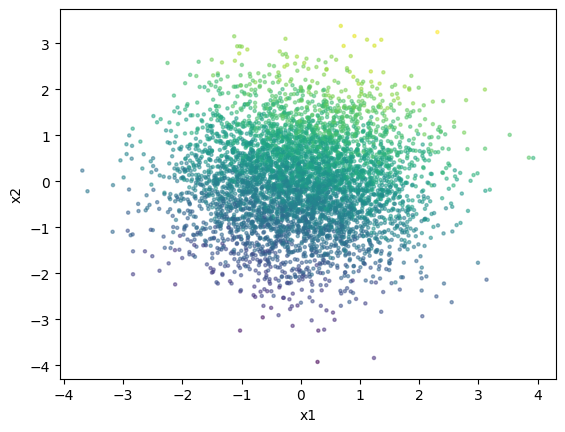

In [77]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

x, y, c = make_regression(n_samples=5000, n_features=2, bias=10, noise=10, coef=True, random_state=42)

plt.scatter(x[:,0], x[:,1], c=y, s=5, alpha=0.5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

2. 위의 데이터를 가지고 선형회귀를 구현해보세요.

- train data와 test data를 8:2 비율로 분할하세요.
- 예측 오차를 더 줄이기 위해 데이터 표준화를 진행하세요.

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

std_scale = StandardScaler()
std_scale.fit(x_train)

x_train_std = std_scale.transform(x_train)
x_test_std = std_scale.transform(x_test)

lr = LinearRegression()
lr.fit(x_train_std, y_train)
print(lr.coef_, lr.intercept_)

[10.23685225 32.38508638] 9.716147166055528


3. `make_classification()`을 활용해 로지스틱 회귀용 가상 데이터를 생성하세요.

- sample은 1000개, feature variable은 1개로 지정하세요.
- feature variable을 1개로 지정했기 때문에, 관련된 변수들을 모두 조정해야 합니다. `n_informative`, `n_redundant`, `n_cluster_per_class` 의 변수를 알맞게 조정해보세요.

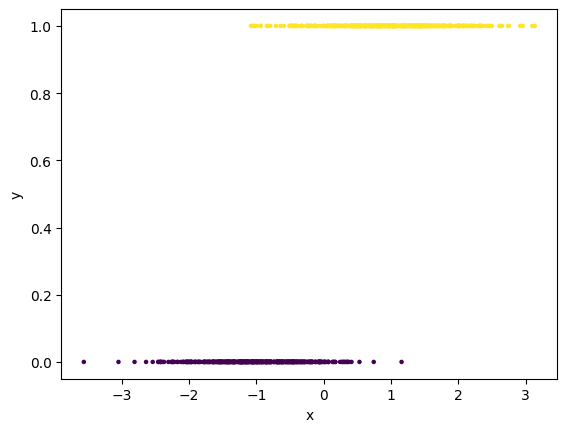

In [79]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

x, y = make_classification(n_samples=1000, n_features=1, n_informative=1,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

plt.scatter(x, y, c=y, s=5)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

4. 위의 데이터를 가지고 로지스틱 회귀를 구현해보세요.

- train data와 test data를 8:2 비율로 분할하세요.
- 규제는 'l2'로, 규제를 제어하는 매개변수는 1로 지정하고, iteration은 1000으로 지정합니다.

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

lr = LogisticRegression(penalty='l2', C=1.0, max_iter=1000)
lr.fit(x_train, y_train)
print(lr.coef_, lr.intercept_)

[[3.78919469]] [0.1495603]
